In [14]:
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')
df = pd.read_csv("../../../../datasets/001_creditcard_fraud/creditcard.csv")
df.shape

(284807, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [132]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
259346,159072.0,1.914822,-1.433581,0.257700,-0.947746,-1.037394,1.618049,-1.983669,0.672371,0.629838,...,0.548825,1.827164,0.319464,-1.267276,-0.739531,0.034230,0.126379,-0.044889,15.99,0
208994,137360.0,1.757259,-0.023838,0.944493,3.773188,-0.820666,0.855771,-1.165241,0.483432,-0.100729,...,0.281617,0.811455,0.275421,-0.041433,-0.586655,-0.045673,0.041143,-0.027230,12.13,0
246438,153174.0,-0.662942,1.344758,-0.237461,0.799891,2.193426,1.101952,1.386810,0.209515,-1.125685,...,0.043780,0.281804,-0.481728,-0.673956,0.991140,-0.110085,0.090594,0.078726,41.17,0
159287,112391.0,-0.722760,0.213574,-0.482812,-1.594112,2.674369,0.742771,0.542552,0.487557,-0.310845,...,-0.092807,-0.383163,0.174363,-1.059409,-0.954924,-0.048187,0.149997,0.216060,1.29,0
22990,32535.0,-1.277142,-0.312838,2.495012,0.223261,-0.728538,0.592501,1.172541,-0.018738,-0.014722,...,0.502477,1.088756,0.415438,0.064300,0.126015,-0.410864,-0.121289,-0.079724,300.00,0


In [135]:
pd.set_option('precision', 2)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,...,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,284807.00,2.85e+05
mean,94813.86,3.92e-15,5.69e-16,-8.77e-15,2.78e-15,-1.55e-15,2.01e-15,-1.69e-15,-1.93e-16,-3.14e-15,...,1.54e-16,7.96e-16,5.37e-16,4.46e-15,1.45e-15,1.70e-15,-3.66e-16,-1.21e-16,88.35,1.73e-03
std,47488.15,1.96e+00,1.65e+00,1.52e+00,1.42e+00,1.38e+00,1.33e+00,1.24e+00,1.19e+00,1.10e+00,...,7.35e-01,7.26e-01,6.24e-01,6.06e-01,5.21e-01,4.82e-01,4.04e-01,3.30e-01,250.12,4.15e-02
min,0.00,-5.64e+01,-7.27e+01,-4.83e+01,-5.68e+00,-1.14e+02,-2.62e+01,-4.36e+01,-7.32e+01,-1.34e+01,...,-3.48e+01,-1.09e+01,-4.48e+01,-2.84e+00,-1.03e+01,-2.60e+00,-2.26e+01,-1.54e+01,0.00,0.00e+00
25%,54201.50,-9.20e-01,-5.99e-01,-8.90e-01,-8.49e-01,-6.92e-01,-7.68e-01,-5.54e-01,-2.09e-01,-6.43e-01,...,-2.28e-01,-5.42e-01,-1.62e-01,-3.55e-01,-3.17e-01,-3.27e-01,-7.08e-02,-5.30e-02,5.60,0.00e+00
50%,84692.00,1.81e-02,6.55e-02,1.80e-01,-1.98e-02,-5.43e-02,-2.74e-01,4.01e-02,2.24e-02,-5.14e-02,...,-2.95e-02,6.78e-03,-1.12e-02,4.10e-02,1.66e-02,-5.21e-02,1.34e-03,1.12e-02,22.00,0.00e+00
75%,139320.50,1.32e+00,8.04e-01,1.03e+00,7.43e-01,6.12e-01,3.99e-01,5.70e-01,3.27e-01,5.97e-01,...,1.86e-01,5.29e-01,1.48e-01,4.40e-01,3.51e-01,2.41e-01,9.10e-02,7.83e-02,77.16,0.00e+00
max,172792.00,2.45e+00,2.21e+01,9.38e+00,1.69e+01,3.48e+01,7.33e+01,1.21e+02,2.00e+01,1.56e+01,...,2.72e+01,1.05e+01,2.25e+01,4.58e+00,7.52e+00,3.52e+00,3.16e+01,3.38e+01,25691.16,1.00e+00


In [136]:
df.loc[:,['Time','Amount']].describe()

,Time,Amount
count,284807.00,284807.00
mean,94813.86,88.35
std,47488.15,250.12
min,0.00,0.00
25%,54201.50,5.60
50%,84692.00,22.00
75%,139320.50,77.16
max,172792.00,25691.16


In [61]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [62]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [63]:
df.isnull().any().any()

False

In [64]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [65]:
df['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Text(0.5, 1.0, 'Heatmap of Correlation')

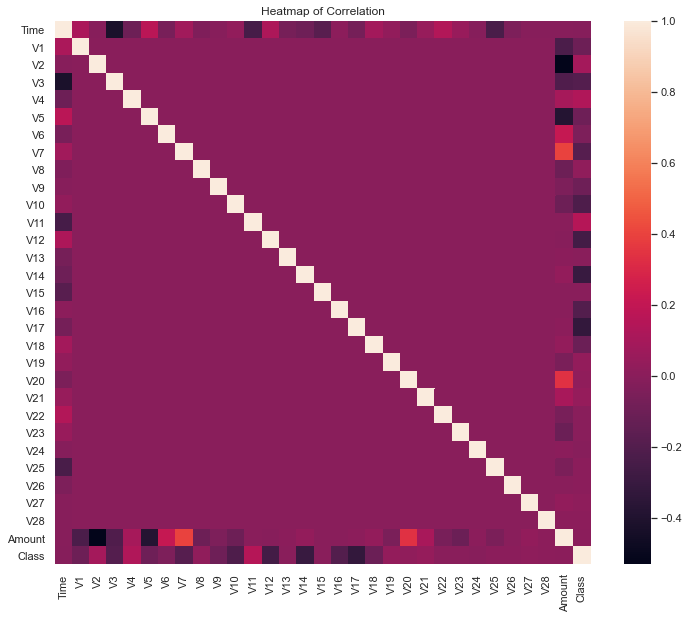

In [137]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [139]:
df.skew()

Time      -0.04
V1        -3.28
V2        -4.62
V3        -2.24
V4         0.68
V5        -2.43
V6         1.83
V7         2.55
V8        -8.52
V9         0.55
V10        1.19
V11        0.36
V12       -2.28
V13        0.07
V14       -2.00
V15       -0.31
V16       -1.10
V17       -3.84
V18       -0.26
V19        0.11
V20       -2.04
V21        3.59
V22       -0.21
V23       -5.88
V24       -0.55
V25       -0.42
V26        0.58
V27       -1.17
V28       11.19
Amount    16.98
Class     24.00
dtype: float64

In [ ]:
v16_col = df["V16"]

describe_func(v16_col)
visualize_func(v16_col, y_data)

raw_data["V16"] = box_cox_transformation(v16_col)
v16_col = raw_data["V16"]

describe_func(v16_col)
visualize_func(v16_col, y_data)

outlier_analysis(raw_, "V16", False)
v16_col = raw_data["V16"]
        y_data = raw_data["Class"]

        describe_func(v16_col)
        visualize_func(v16_col,y_data)

In [66]:
X =  df.drop(labels= 'Class',axis = 1)
y =  df.loc[:,'Class']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)

In [68]:
X_train.shape,X_test.shape

((227845, 30), (56962, 30))

In [69]:
X_train.is_copy = False
X_test.is_copy = False
X_train['Time'].describe()

count    227845.000000
mean      94707.617670
std       47523.204111
min           0.000000
25%       54086.000000
50%       84609.000000
75%      139261.000000
max      172792.000000
Name: Time, dtype: float64

In [70]:
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

X_train['Time'].max() / 24

1.9999074074074075

Text(0.5, 1.0, 'Transaction times')

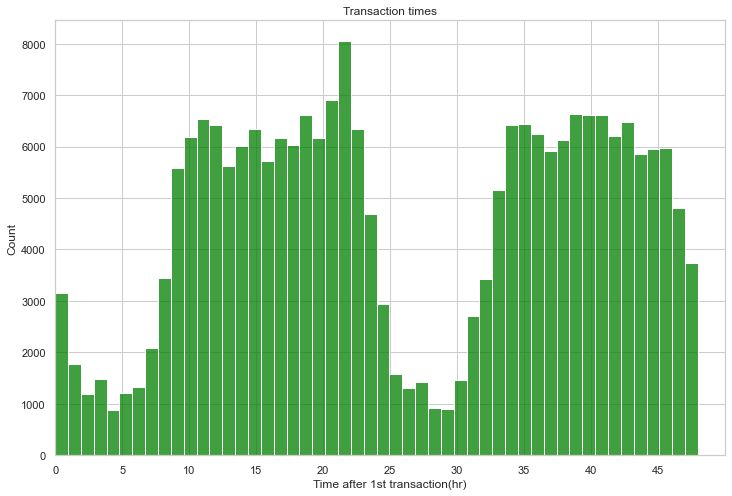

In [71]:
plt.figure(figsize=(12,8))
sns.histplot(X_train['Time'],bins=50,color='green')
plt.xlim([0,50])
plt.xticks(np.arange(0,50,5))
plt.xlabel('Time after 1st transaction(hr)')
plt.ylabel('Count')
plt.title('Transaction times')

In [73]:
X_train['Amount'].describe()

count    227845.000000
mean         88.709296
std         250.026305
min           0.000000
25%           5.550000
50%          22.000000
75%          77.890000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

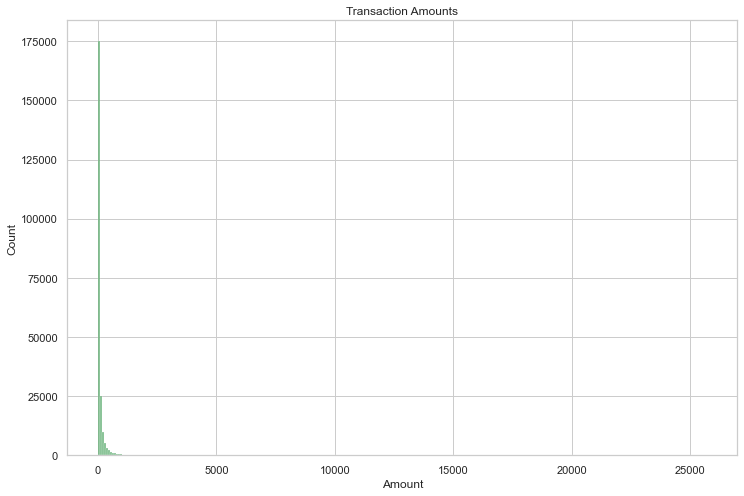

In [75]:
plt.figure(figsize=(12,8))
sns.histplot(X_train['Amount'],bins=300,color='g')
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

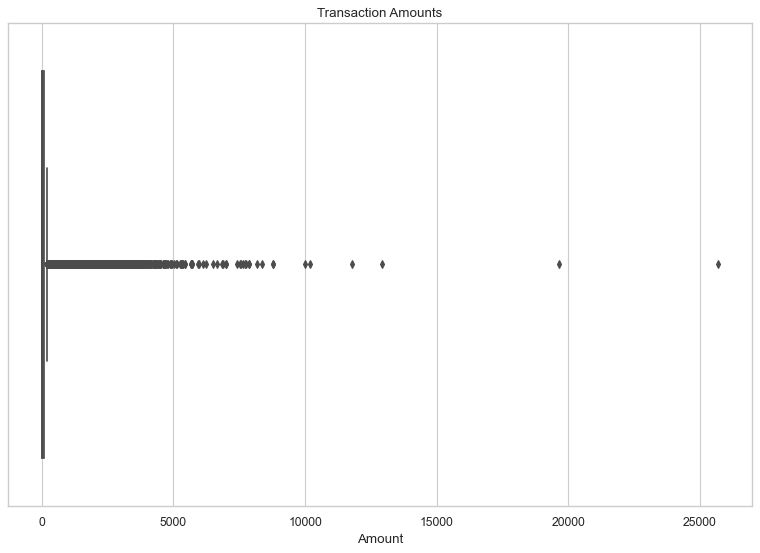

In [81]:
plt.figure(figsize = (12,8),dpi=80)
sns.boxplot(x=X_train['Amount'])
plt.title('Transaction Amounts')

In [89]:
X_train['Amount'].skew()

16.91030354651674

In [88]:
X_train.loc[:,'Amount'] = X_train['Amount'] + 1e-9

In [90]:
#Box-Cox tranform
from scipy import stats
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)

In [92]:
X_train.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9341,3.766111,1.148607,-0.004154,-0.231106,1.124256,0.696077,1.177523,-0.160142,0.201478,1.568269,...,-0.122816,-0.294334,-0.550620,-0.309693,-1.773489,0.791006,-0.263954,-0.008489,-0.011284,5.423970
210529,38.339444,-0.910538,-0.971254,1.033829,-1.514111,-1.068542,0.148626,-0.660712,0.694582,-0.563151,...,0.362532,0.183422,0.082033,0.245169,-0.347895,-0.046626,-0.366928,-0.130325,-0.161839,7.046293
51525,12.499167,1.222501,0.491904,-0.082522,0.987913,0.164676,-0.845453,0.515114,-0.258261,-0.667442,...,-0.076698,0.068123,0.244725,-0.173798,0.373883,0.849200,-0.317268,-0.007417,0.003691,2.397348
128333,21.853611,1.184303,-0.066290,0.400333,-0.048278,-0.447460,-0.521259,-0.103204,-0.044640,-0.032670,...,0.041195,-0.268415,-0.900138,0.112504,0.032476,0.046804,0.472132,-0.068010,0.008341,4.774875
252025,43.227222,-0.484059,0.439377,-2.033102,-3.398765,2.209264,3.175789,-0.566306,0.423994,-1.281704,...,-0.171988,1.344784,1.271853,0.055813,0.735276,-0.629507,-0.178298,0.394319,0.240147,3.266353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249626,42.917222,-0.312808,1.571520,0.625071,2.851596,1.440896,0.370273,1.559423,-0.122626,-2.127059,...,-0.013666,-0.072840,-0.276301,-0.144144,-0.813403,-0.094574,-0.086966,0.101273,0.154888,5.135193
188363,35.538889,2.313488,-1.066660,-2.698797,-1.810692,0.181929,-0.825158,0.014053,-0.497443,-2.466535,...,-0.303714,0.175502,0.943729,-0.209989,0.371705,0.688140,0.270351,-0.078804,-0.087019,5.277588
224660,39.973056,1.980328,0.104427,-0.923277,1.353652,0.047918,-0.223057,-0.382536,0.034461,0.965143,...,-0.217607,-0.283405,-0.677841,0.263567,-0.961968,-0.298113,-0.888231,0.073120,-0.005631,2.382383
206178,37.805000,1.888991,-0.199603,-0.401767,1.366907,-0.105339,0.441041,-0.401390,0.227025,0.894311,...,-0.254580,-0.469722,-1.120237,0.470175,0.620089,-0.347252,-1.155696,0.049377,-0.033304,2.502845


Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

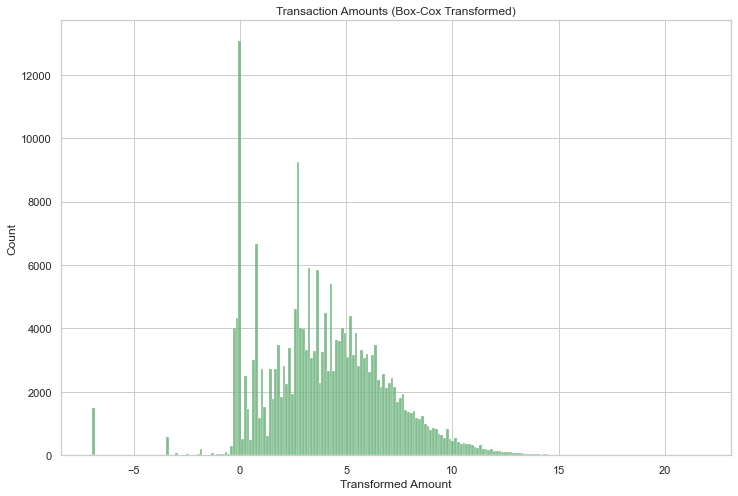

In [96]:
#plotting newly transformed accounts
plt.figure(figsize=(12,8))
sns.histplot(X_train['Amount'],color='g')
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [97]:
X_train['Amount'].describe()

count    227845.000000
mean          3.985515
std           2.972505
min          -6.982733
25%           1.927181
50%           3.831861
75%           5.919328
max          21.680567
Name: Amount, dtype: float64

In [98]:
X_train['Amount'].skew()

0.11421488033443958

In [99]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)

C:\Users\35387\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\35387\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


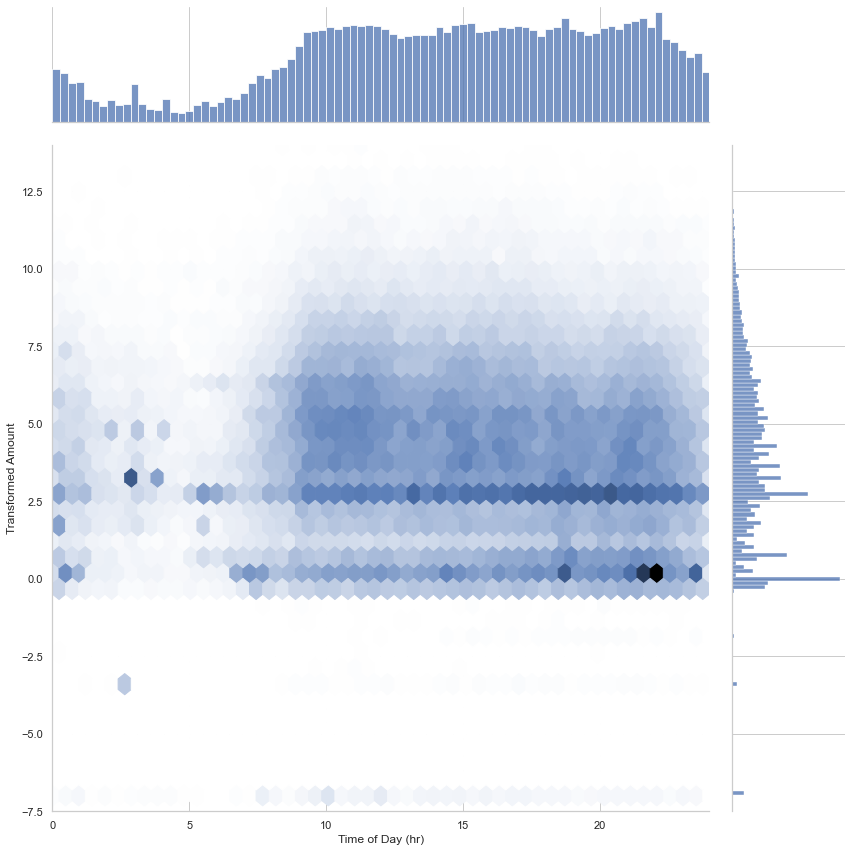

In [103]:
#Time vs Amount
sns.jointplot(X_train['Time'].apply(lambda x: x % 24), X_train['Amount'], kind='hex', size=12, xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')

In [104]:
pca_vars = ['V%i' % k for k in range(1,29)]

In [105]:
X_train[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,-0.000713,-0.001034,0.002557,0.003839,-0.002857,0.002085,0.000022,0.000093,0.000243,-0.000363,...,-0.000146,-0.000796,0.000023,0.000897,0.000765,-0.000380,0.000136,-0.000301,-0.000046,-0.000027
std,1.952399,1.636689,1.514288,1.417086,1.383532,1.333769,1.240239,1.200348,1.096453,1.082580,...,0.815140,0.767956,0.733325,0.725353,0.616772,0.605741,0.522184,0.482187,0.405182,0.331048
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-8.696627,-2.534330,-22.565679,-15.430084
25%,-0.922830,-0.599928,-0.887861,-0.844052,-0.693702,-0.766195,-0.555377,-0.208302,-0.642006,-0.535079,...,-0.456946,-0.212129,-0.227952,-0.541079,-0.162242,-0.354208,-0.317488,-0.327576,-0.070767,-0.053013
50%,0.016743,0.064370,0.180865,-0.016750,-0.055388,-0.271706,0.039185,0.022594,-0.051224,-0.091877,...,0.004371,-0.062809,-0.029095,0.007661,-0.011184,0.040977,0.017081,-0.052599,0.001373,0.011255
75%,1.315147,0.801738,1.027592,0.746907,0.611056,0.401204,0.569307,0.328079,0.596563,0.455577,...,0.459695,0.132873,0.186678,0.529342,0.147825,0.438432,0.351400,0.240554,0.091028,0.078341
max,2.451888,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,5.591971,39.420904,27.202839,10.503090,22.083545,4.584549,7.519589,3.517346,31.612198,33.847808


Text(0.5, 1.0, 'V1-V28 Means')

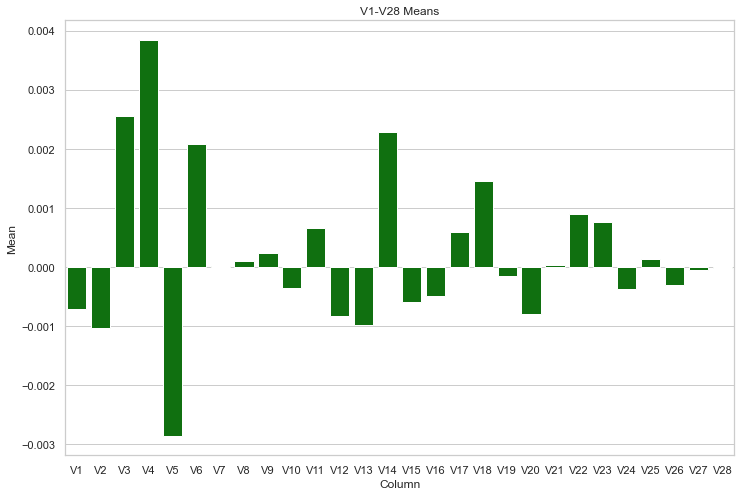

In [106]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

Text(0.5, 1.0, 'V1-V28 Means')

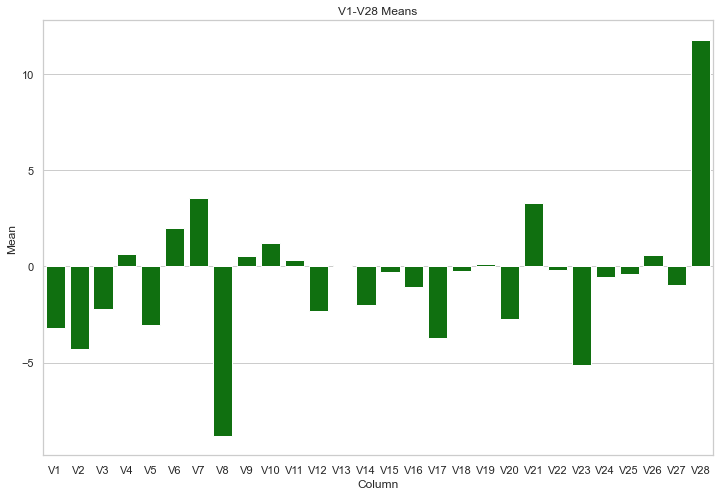

In [107]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

Text(0.5, 1.0, 'V8')

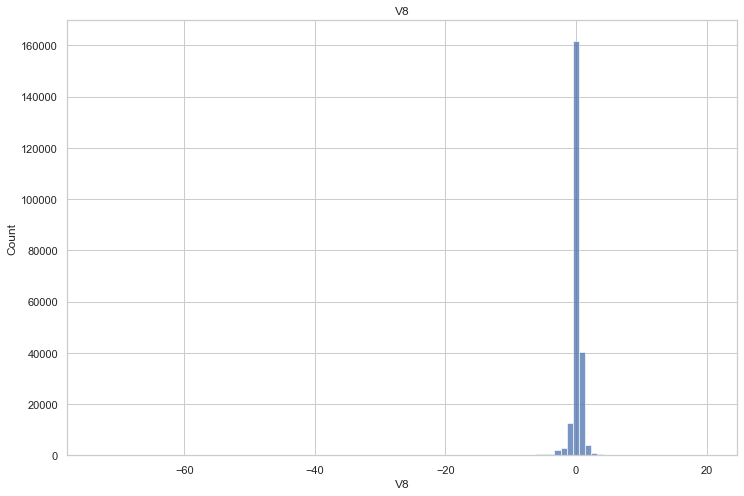

In [109]:
plt.figure(figsize=(12,8))
sns.histplot(X_train['V8'], bins=100)
plt.ylabel('Count')
plt.title('V8')

C:\Users\35387\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'V8')

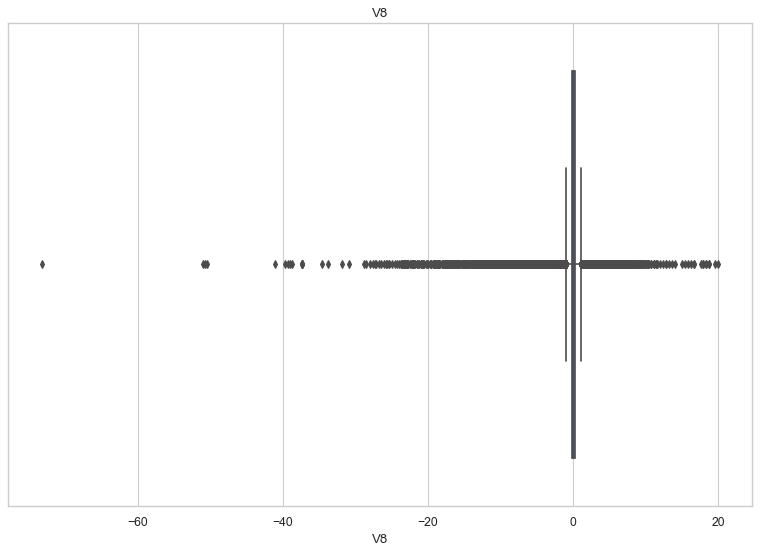

In [110]:
plt.figure(figsize=(12,8), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')

Text(0.5, 1.0, 'V1-V28 Kurtoses')

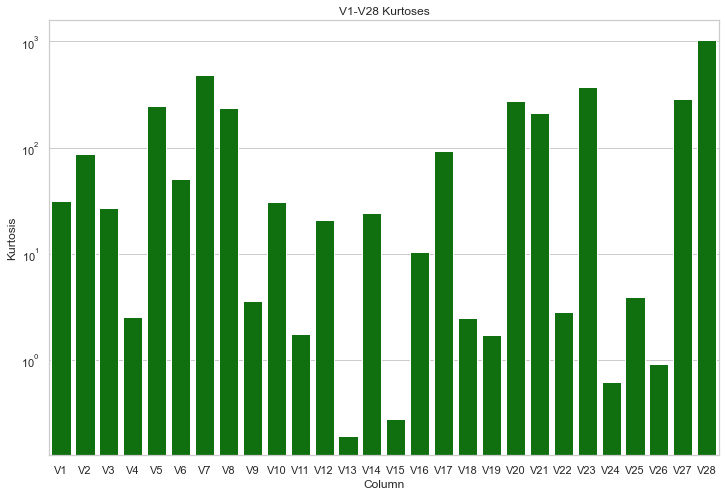

In [111]:
plt.figure(figsize=(12,8))
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='green')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

Text(0.5, 1.0, 'V1-V28 Means')

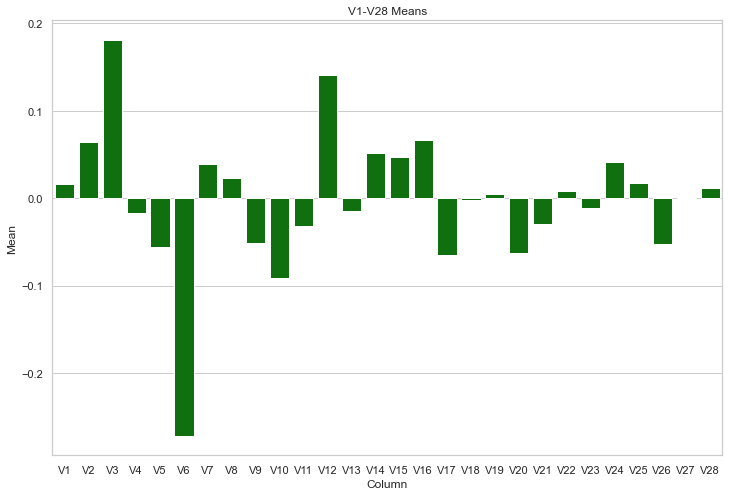

In [112]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

Text(0.5, 1.0, 'V1-V28 IQRs')

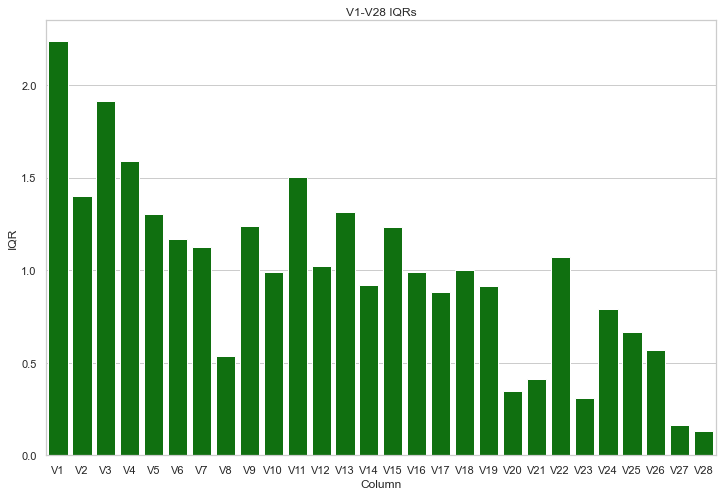

In [113]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='green')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

In [114]:
from sklearn.feature_selection import mutual_info_classif
data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1)

In [115]:
mutual_infos = pd.Series(data,index= X_train.columns)

In [116]:
mutual_infos.sort_values(ascending=False)

V17       0.008037
V14       0.007977
V10       0.007354
V12       0.007354
V11       0.006607
V16       0.005793
V4        0.004843
V3        0.004755
V18       0.004025
V9        0.003996
V7        0.003941
V2        0.003085
V21       0.002304
V27       0.002271
V6        0.002265
V5        0.002254
V1        0.001990
V8        0.001843
V28       0.001757
Time      0.001722
Amount    0.001422
V19       0.001322
V20       0.001136
V23       0.000827
V24       0.000593
V26       0.000459
V22       0.000388
V25       0.000376
V15       0.000230
V13       0.000205
dtype: float64

In [119]:
#log regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [120]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [121]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

In [123]:
MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [124]:
import warnings
with warnings.catch_warnings(): # Suppress warnings from the matthews_corrcoef function
    warnings.simplefilter("ignore")
    grid_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   49.6s finished


In [131]:
grid_sgd.best_score_

0.8054381462050987

In [125]:
grid_sgd.best_params_

{'model__alpha': 233.57214690901213,
 'model__class_weight': 'balanced',
 'model__loss': 'hinge'}

In [126]:
from sklearn.ensemble import RandomForestClassifier
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [127]:
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(X_train, y_train)
grid_rf.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.8s finished


0.8596447282953857

In [128]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [129]:
def classification_eval(estimator,X_test,y_test):
    y_pred=estimator.predict(X_test)
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred),'\n')
    
    print('Classification report')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print("Scalar Metrics")
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

In [130]:
classification_eval(grid_rf, X_test, y_test)

Confusion Matrix
[[56854    10]
 [   15    83]] 

Classification report
              precision    recall  f1-score   support

           0    0.99974   0.99982   0.99978     56864
           1    0.89247   0.84694   0.86911        98

    accuracy                        0.99956     56962
   macro avg    0.94610   0.92338   0.93445     56962
weighted avg    0.99955   0.99956   0.99956     56962

Scalar Metrics
          MCC = 0.86919
        AUPRC = 0.85098
        AUROC = 0.95924
Cohen's kappa = 0.86889
     Accuracy = 0.99956
